### Desafío 1. Importar librerías y .csv

In [2]:
#import básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

#formateo los siguientes gráficos
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 10)

In [63]:
df = pd.read_csv('nations.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 1: invalid continuation byte

#### warning: va a encontrar un error en el formato ¿Cómo lo podemos solucionar?.

Para solucionar el problema, cambié la codificación a 'latin_1'

In [64]:
df = pd.read_csv('nations.csv', encoding='latin_1')

In [65]:
df.head()

Unnamed: 0       country  region           gdp    school      adfert  \
0           1       Algeria  Africa   7300.399902  6.716667    7.300000   
1           2         Benin  Africa   1338.800049  3.100000  111.699997   
2           3      Botswana  Africa  12307.400391  8.600000   52.099998   
3           4  Burkina Faso  Africa   1063.400024  1.300000  124.800003   
4           5       Burundi  Africa    349.200012  2.483333   18.600000   

   chldmort       life       pop      urban  femlab   literacy   co2  \
0     34.75  72.316666  34172236  64.933334  0.4522  72.599998  15.0   
1    122.75  54.733334   8237634  41.000000  0.8482  41.700001   1.2   
2     60.25  52.250000   1941233  59.250000  0.8870  84.099998   9.2   
3    170.50  53.783333  15308383  23.583334  0.8584  23.600000   0.2   
4    168.50  48.866665   7821783  10.250000  1.0344  66.599998   0.1   

        gini  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4  33.299999

In [66]:
df.columns

Index(['Unnamed: 0', 'country', 'region', 'gdp', 'school', 'adfert',
       'chldmort', 'life', 'pop', 'urban', 'femlab', 'literacy', 'co2',
       'gini'],
      dtype='object')

### Desafío 2. Refactor gráficos matplotlib a seaborn

#### a)

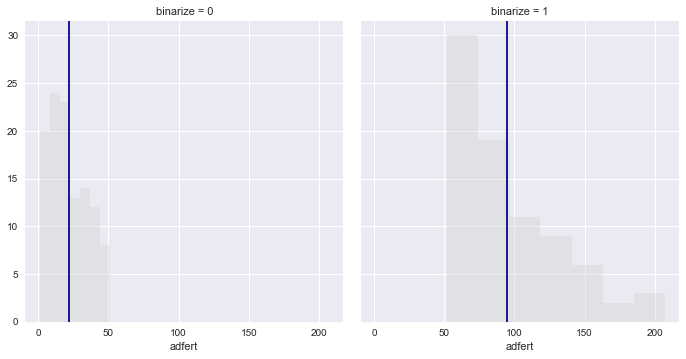

In [67]:
df['binarize'] = np.where(df['adfert'] > np.mean(df['adfert']), 1, 0)
    
grid = sns.FacetGrid(df, col='binarize', col_wrap=2)
grid = grid.map(sns.distplot, 'adfert', kde=False, hist_kws={'color':'lightgrey', 'alpha':.4})

hist_0 = df[df['binarize']==0]['adfert'].dropna().mean()
hist_1 = df[df['binarize']==1]['adfert'].dropna().mean()

grid.fig.set_size_inches(10,6)
    
grid.facet_axis(0,0)
plt.axvline(hist_0, color='darkblue')
   
grid.facet_axis(0,1)
plt.axvline(hist_1, color='darkblue')

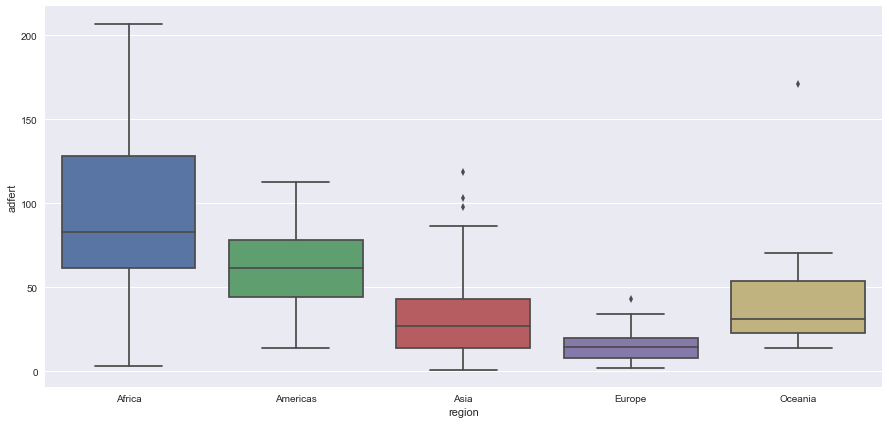

In [68]:
sns.boxplot(x="region", y="adfert", data=df)

### b)

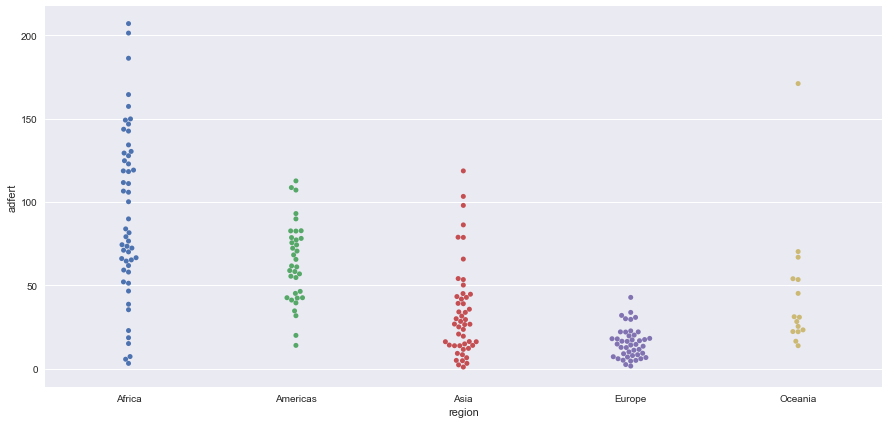

In [69]:
sns.swarmplot(x='region', y='adfert', data=df)

### 3. Genere un heatmap entre todas las variables

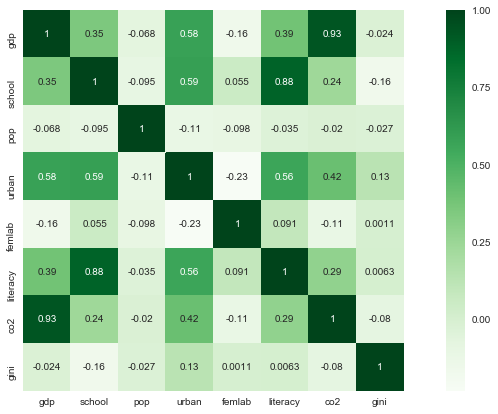

In [71]:
#variables de interes: femlab , literacy y school
sub_df = df.loc[:, lambda df: ['gdp', 'school', 'pop','urban','femlab','literacy','co2','gini']].dropna()
sns.heatmap(sub_df.corr(), cmap='Greens', annot=True, square=True)

R: Las principales correlaciones (superiores a .6) son: Tasa de alfabetismo (literacy) con Promedio años de escolaridad (school) y Toneladas de Co2 mitidas per cápita (co2) con Producto Interno Bruto per cápita (gdp). 

### 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

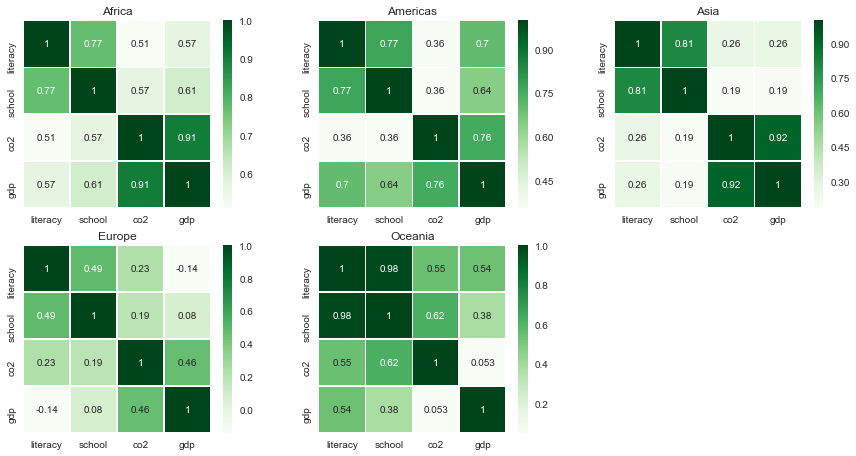

In [61]:
final_df = df.loc[:, lambda df: ['region', 'literacy', 'school', 'co2', 'gdp']].dropna()
regiones = final_df['region'].unique()
plt.rcParams['figure.figsize'] = (15, 20)
c=1
j=int(len(regiones))
for i in regiones:
    plt.subplot(j,3,c)
    plt.title(i)
    sns.heatmap(final_df[final_df['region']==i].corr(), cmap='Greens', annot=True, linewidth=0.5, square=True)
    c+=1

* Se puede determinar que la correlación entre la Tasa de alfabetismo con el Promedio de años de escolaridad es mayor en Asia y Oceanía. 
* Podemos decir que las Toneladas de Co2 mitidas per cápita está fuertemente relacionada con el Producto Interno Bruto per cápita en países africanos y asiáticos. 
* También podemos decir que en países americanos el PIB per cápita está relacionado directamente con la Tasa de alfabetismo.
* En Europa es la única región donde el Promedio de años de escolaridad no tiene suficiente correlación (mayor a .6) con la Tasa de alfabetismo.

### Bonus Points: Grafique los diagramas de dispersión para los principales hallazgos.

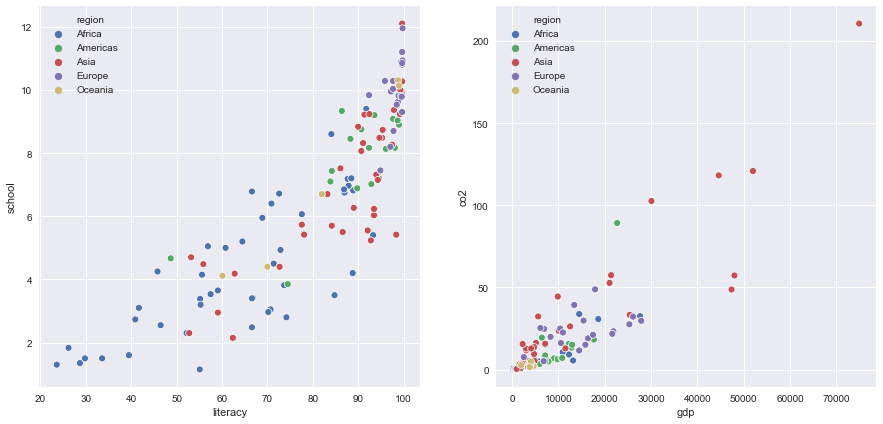

In [62]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.subplot(1,2,1)
sns.scatterplot(x='literacy', y='school', hue='region', data=final_df)
plt.subplot(1,2,2)
sns.scatterplot(y='co2', x='gdp', hue='region', data=final_df)